In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import BallTree
from io import StringIO

In [10]:
# Create DataFrame from you lat/lon dataset
data = """NAME Latitude Longitude
B 50.94029883 7.019146728
C 50.92073002 6.975268711
D 50.99807758 6.980865543
E 50.98074288 7.035060206
F 51.00696972 7.035993783
G 50.97369889 6.928538763
H 50.94133859 6.927878587
A 50.96712502 6.977825322"""

# Use StringIO to allow reading of string as CSV
df = pd.read_csv(StringIO(data), sep = ' ')

# Setup Balltree using df as reference dataset
# Use Haversine calculate distance between points on the earth from lat/long
# haversine - https://pypi.org/project/haversine/ 
tree = BallTree(np.deg2rad(df[['Latitude', 'Longitude']].values), metric='haversine')

# Setup distance queries (points for which we want to find nearest neighbors)
other_data = """NAME Latitude Longitude
B_alt 50.94029883 7.019146728
C_alt 50.92073002 6.975268711"""

df_other = pd.read_csv(StringIO(other_data), sep = ' ')

query_lats = df_other['Latitude']
query_lons = df_other['Longitude']

# Find closest city in reference dataset for each in df_other
# use k = 3 for 3 closest neighbors
distances, indices = tree.query(np.deg2rad(np.c_[query_lats, query_lons]), k = 3)

r_km = 6371 # multiplier to convert to km (from unit distance)
for name, d, ind in zip(df_other['NAME'], distances, indices):
  print(f"NAME {name} closest matches:")
  for i, index in enumerate(ind):
    print(f"\t{df['NAME'][index]} with distance {d[i]*r_km:.4f} km")

NAME B_alt closest matches:
	B with distance 0.0000 km
	C with distance 3.7671 km
	A with distance 4.1564 km
NAME C_alt closest matches:
	C with distance 0.0000 km
	B with distance 3.7671 km
	H with distance 4.0350 km


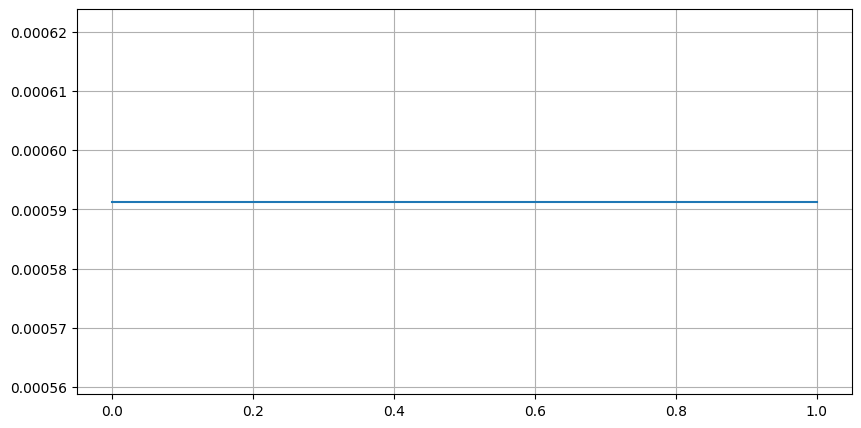

In [11]:
tree = BallTree(np.deg2rad(df[['Latitude', 'Longitude']].values), metric='haversine')
distances, indices = tree.kneighbors(np.deg2rad(np.c_[query_lats, query_lons]), k = 3)
distances, idx = nn.kneighbors(X)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,5))
plt.plot(distances)
plt.grid(True)
plt.show()

In [7]:
X= df[['Latitude', 'Longitude']].copy()
X

,Latitude,Longitude
0,50.940299,7.019147
1,50.920730,6.975269
2,50.998078,6.980866
3,50.980743,7.035060
4,51.006970,7.035994
5,50.973699,6.928539
6,50.941339,6.927879
7,50.967125,6.977825


In [14]:
nn = NearestNeighbors(n_neighbors=2, metric='haversine').fit(X)
distances, idx = nn.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

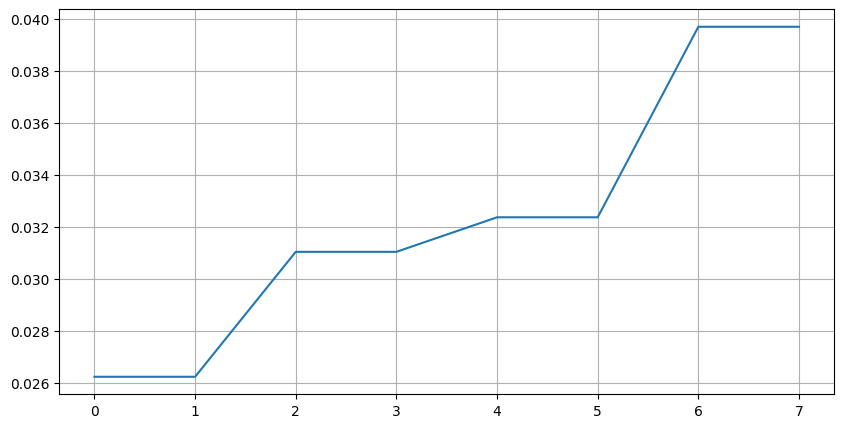

In [15]:
plt.figure(figsize=(10,5))
plt.plot(distances)
plt.grid(True)
plt.show()